# SBA 1 - Select Predictors

In [1]:
# Imports

import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, BayesianRidge
import statsmodels.api as sm
import statsmodels.formula.api as smf
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector
working_directory = os.getcwd()
print(working_directory)

no display found. Using non-interactive Agg backend
/Users/pouyasohrab


In [2]:
# Directory

path = working_directory + '/dmba/SBAcase.11.13.17.csv'
df = pd.read_csv(path)

# Pre-Processing and Analyze DataFrame

In [3]:
# Analyze Data

df.head(100)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1284435008,HERRING GROUP INC.,WALNUT,CA,91789,CAPITAL ONE NATL ASSOC,VA,531390,16553,...,34794,35000,17500,0,0,0.50,1,1290,17877.0,1
96,0,1292166006,CYNTHIA THUY VU,CONCORD,CA,94519,EAST WEST BANK,CA,531210,16868,...,230645,394200,295650,0,1,0.75,0,8040,24931.0,1
97,0,1298785009,The Churchill Real Estate Grou,SAN DIEGO,CA,92108,BANK OF AMERICA NATL ASSOC,NC,531210,16566,...,13744,50000,25000,0,0,0.50,0,330,16917.0,1
98,1,1299775008,"Envisage Realty, Inc.",SALINAS,CA,93906,BANK OF AMERICA NATL ASSOC,NC,531311,16567,...,8417,10000,5000,1,0,0.50,1,990,17577.0,0


In [4]:
# Analyze Nulls and Data

df.describe()

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2101.000000,2102.000000,...,2.102000e+03,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2099.000000,2102.000000
mean,0.500000,4.469172e+09,92698.612274,531630.902950,16179.587060,2004.035680,126.980495,10.150809,1.153736,2.549952,...,2.002908e+04,2.330641e+05,1.891759e+05,0.154139,0.274500,0.671055,0.068506,3809.414843,20076.896141,0.326356
std,0.500119,2.530069e+09,1878.208435,521.836986,1454.931276,4.006321,93.798944,34.402420,0.362099,8.010175,...,7.543229e+04,3.436310e+05,2.989268e+05,0.361168,0.446368,0.186519,0.252673,2813.968318,2854.510377,0.468991
min,0.000000,1.004285e+09,65757.000000,531110.000000,10554.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,0.000000,2.392978e+09,91402.000000,531210.000000,15695.750000,2003.000000,60.000000,2.000000,1.000000,0.000000,...,0.000000e+00,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18316.500000,0.000000
50%,0.500000,3.621730e+09,92559.500000,531312.000000,16556.000000,2005.000000,84.000000,3.000000,1.000000,0.000000,...,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,1.000000,6.551607e+09,94127.750000,532230.000000,17149.750000,2007.000000,240.000000,8.000000,1.000000,2.000000,...,1.507350e+04,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22335.000000,1.000000
max,1.000000,9.958873e+09,96161.000000,533110.000000,18911.000000,2012.000000,306.000000,650.000000,2.000000,130.000000,...,1.509550e+06,2.350000e+06,2.115000e+06,1.000000,1.000000,1.000000,1.000000,9180.000000,27598.000000,1.000000


In [5]:
df.isna()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

Selected                0
LoanNr_ChkDgt           0
Name                    0
City                    0
State                   0
Zip                     0
Bank                    3
BankState               3
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                1
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               2
LowDoc                  3
ChgOffDate           1405
DisbursementDate        3
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
New                     0
RealEstate              0
Portion                 0
Recession               0
daysterm                0
xx                      3
Default                 0
dtype: int64

In [8]:
# Input mean value

mean = df['xx'].mean()
df['xx'] = df['xx'].fillna(mean)

In [9]:
df.dtypes

Selected               int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate           float64
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Recession              int64
daysterm               int64
xx                   float64
Default       

In [10]:
list(df.columns)

['Selected',
 'LoanNr_ChkDgt',
 'Name',
 'City',
 'State',
 'Zip',
 'Bank',
 'BankState',
 'NAICS',
 'ApprovalDate',
 'ApprovalFY',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'New',
 'RealEstate',
 'Portion',
 'Recession',
 'daysterm',
 'xx',
 'Default']

In [11]:
list(df.select_dtypes(include='number'))

['Selected',
 'LoanNr_ChkDgt',
 'Zip',
 'NAICS',
 'ApprovalDate',
 'ApprovalFY',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'New',
 'RealEstate',
 'Portion',
 'Recession',
 'daysterm',
 'xx',
 'Default']

In [12]:
# See Default Variable

print(df['Default'].dtype)

print(df['Default'].unique())

int64
[0 1]


# Data Visualization

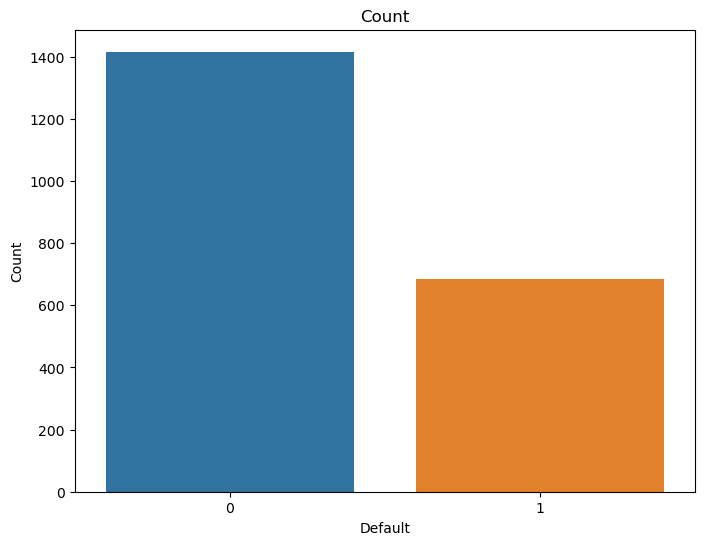

In [13]:
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df)
plt.title('Count')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

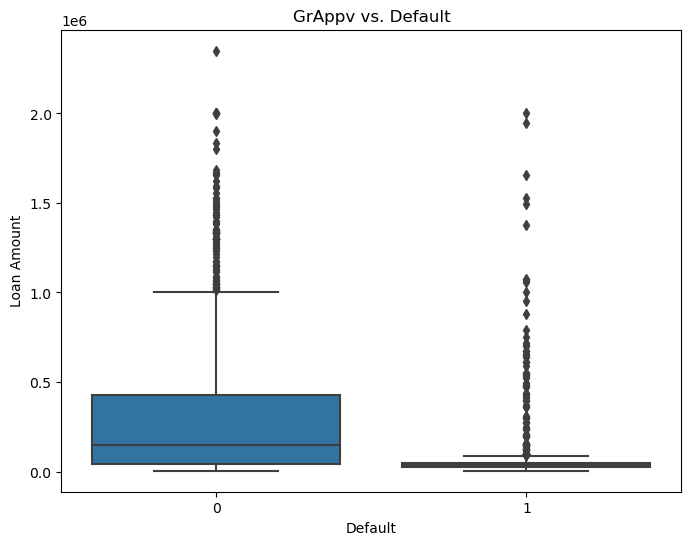

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Default', y='GrAppv', data=df)
plt.title('GrAppv vs. Default')
plt.xlabel('Default')
plt.ylabel('Loan Amount')
plt.show()

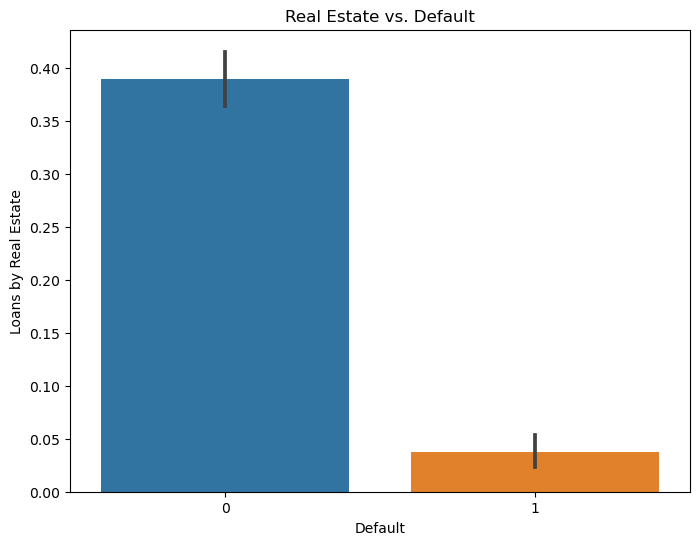

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Default', y='RealEstate', data=df)
plt.title('Real Estate vs. Default')
plt.xlabel('Default')
plt.ylabel('Loans by Real Estate')
plt.show()

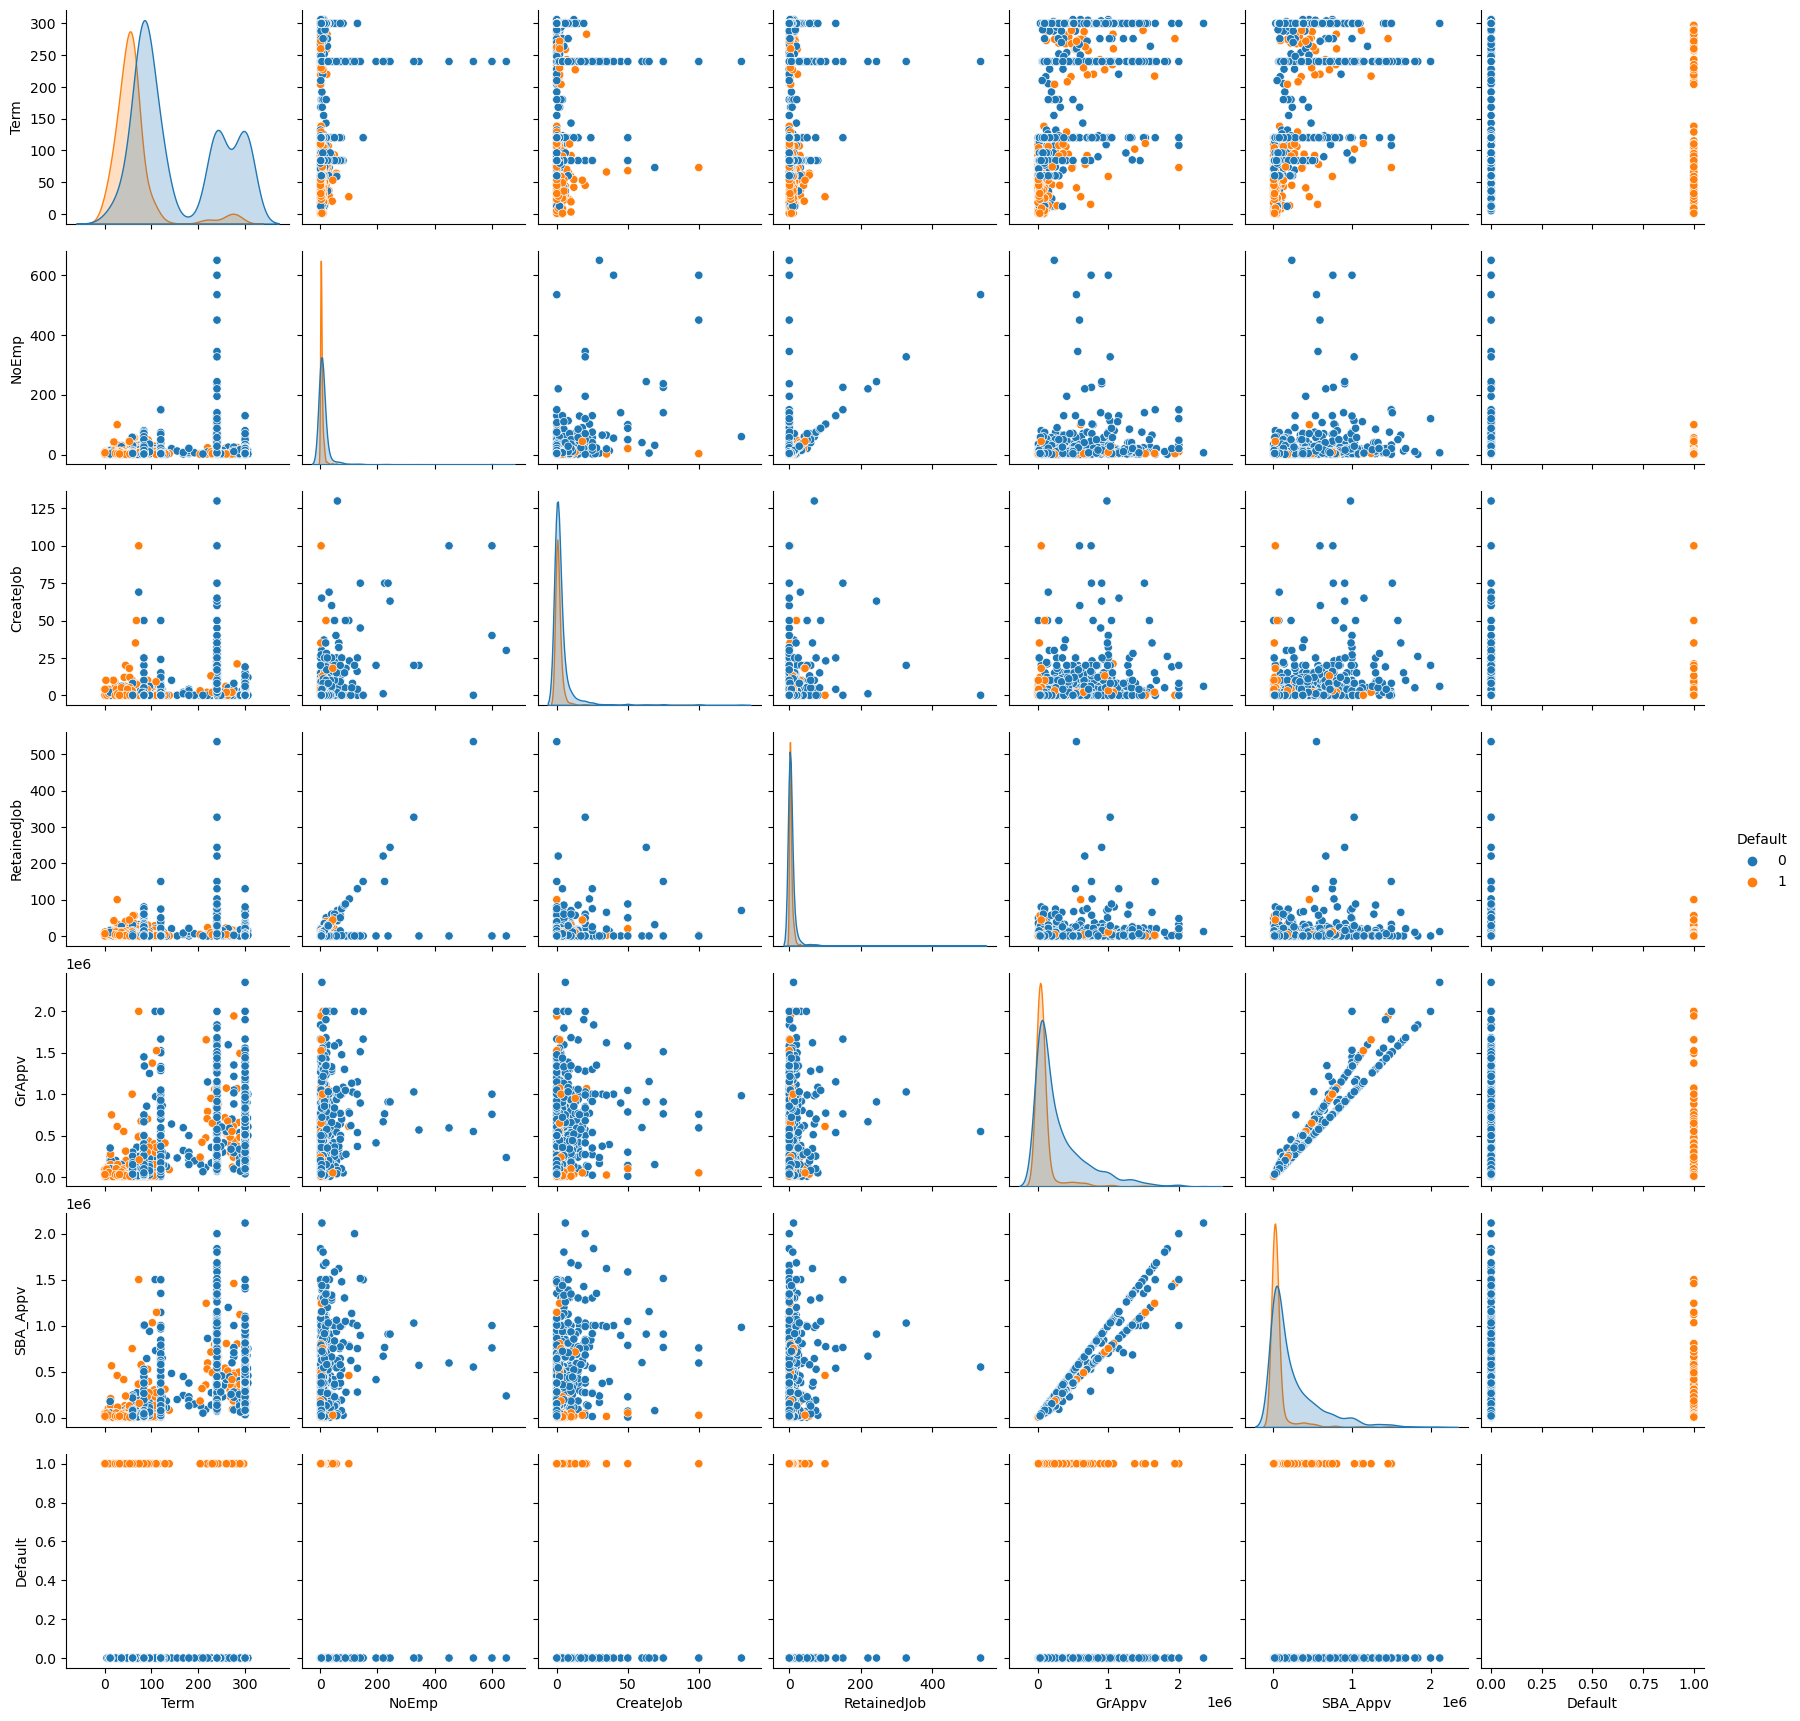

In [16]:
# Pairplots

sns.pairplot(data=df, vars=['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'Default'], hue='Default')
plt.show()

In [17]:
# Define Quantitative

Quantitative_Numerical = list(df.select_dtypes(exclude = 'object'))
Quantitative_Numerical

['Selected',
 'LoanNr_ChkDgt',
 'Zip',
 'NAICS',
 'ApprovalDate',
 'ApprovalFY',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'New',
 'RealEstate',
 'Portion',
 'Recession',
 'daysterm',
 'xx',
 'Default']

In [18]:
# Normalize

numeric_data_types = ['int64', 'float64']

numeric_cols = df.select_dtypes(include=numeric_data_types)

# Normalize the numeric columns

df[numeric_cols.columns] = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

df.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,-0.999762,-1.369483,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,0.054514,CALIFORNIA BANK & TRUST,CA,1.512152,-0.759890,...,-0.265524,-0.590936,-0.582671,-0.426779,-0.614964,-0.917089,-0.271126,-0.969952,-1.367900,-0.695868
1,0.999762,-1.369384,DREAM HOME REALTY,TORRANCE,CA,-1.167928,CALIFORNIA BANK & TRUST,CA,-0.806579,-0.721400,...,-0.265524,-0.590936,-0.582671,-0.426779,-0.614964,-0.917089,3.686564,-0.756730,-0.848000,-0.695868
2,-0.999762,-1.369199,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,-0.317117,CALIFORNIA BANK & TRUST,CA,-0.806579,-0.681535,...,-0.265524,-0.590936,-0.582671,-0.426779,-0.614964,-0.917089,-0.271126,-0.969952,-1.324780,-0.695868
3,0.999762,-1.368989,Shiva Management,SAN DIEGO,CA,-0.314455,CALIFORNIA BANK & TRUST,CA,-0.611116,-0.316570,...,-0.265524,-0.532734,-0.549218,-0.426779,-0.614964,-0.917089,-0.271126,-0.969952,-1.143183,-0.695868
4,0.999762,-1.368807,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,-0.720693,SBA - EDF ENFORCEMENT ACTION,CO,-0.461644,0.453913,...,-0.265524,0.319924,0.514588,-0.426779,1.625338,1.763599,-0.271126,1.204912,1.411444,-0.695868


<function matplotlib.pyplot.show(close=None, block=None)>

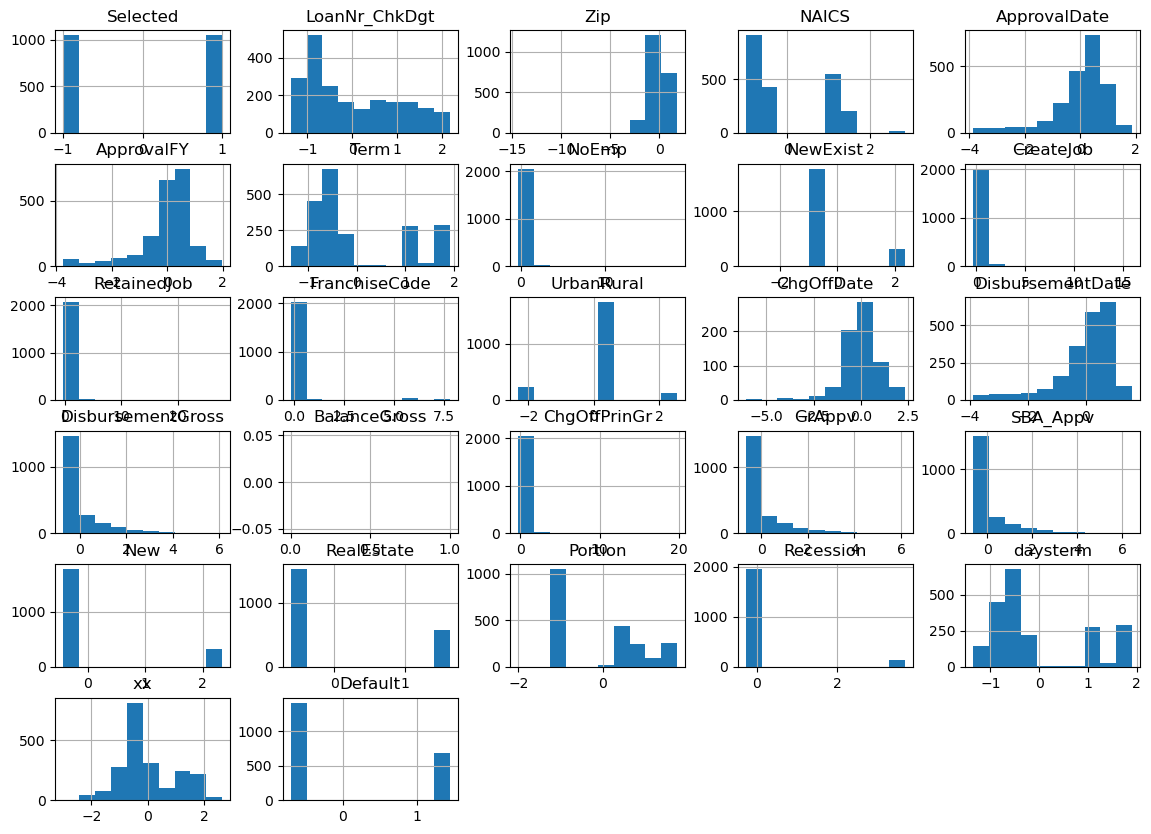

In [19]:
# Histograms

df[Quantitative_Numerical].hist(bins=10, figsize=(14,10))
plt.show

In [20]:
# Organize Variances

variance = df[Quantitative_Numerical].var()
variance.sort_values(ascending=False).index.tolist()

['Default',
 'FranchiseCode',
 'UrbanRural',
 'daysterm',
 'Selected',
 'RetainedJob',
 'NAICS',
 'New',
 'SBA_Appv',
 'xx',
 'Zip',
 'LoanNr_ChkDgt',
 'Term',
 'ChgOffDate',
 'Portion',
 'NoEmp',
 'ApprovalDate',
 'GrAppv',
 'DisbursementGross',
 'ApprovalFY',
 'DisbursementDate',
 'Recession',
 'CreateJob',
 'ChgOffPrinGr',
 'RealEstate',
 'NewExist',
 'BalanceGross']

/var/folders/zs/ph45nnjj2w13bdnb86zrjg600000gn/T/ipykernel_82282/2120159296.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


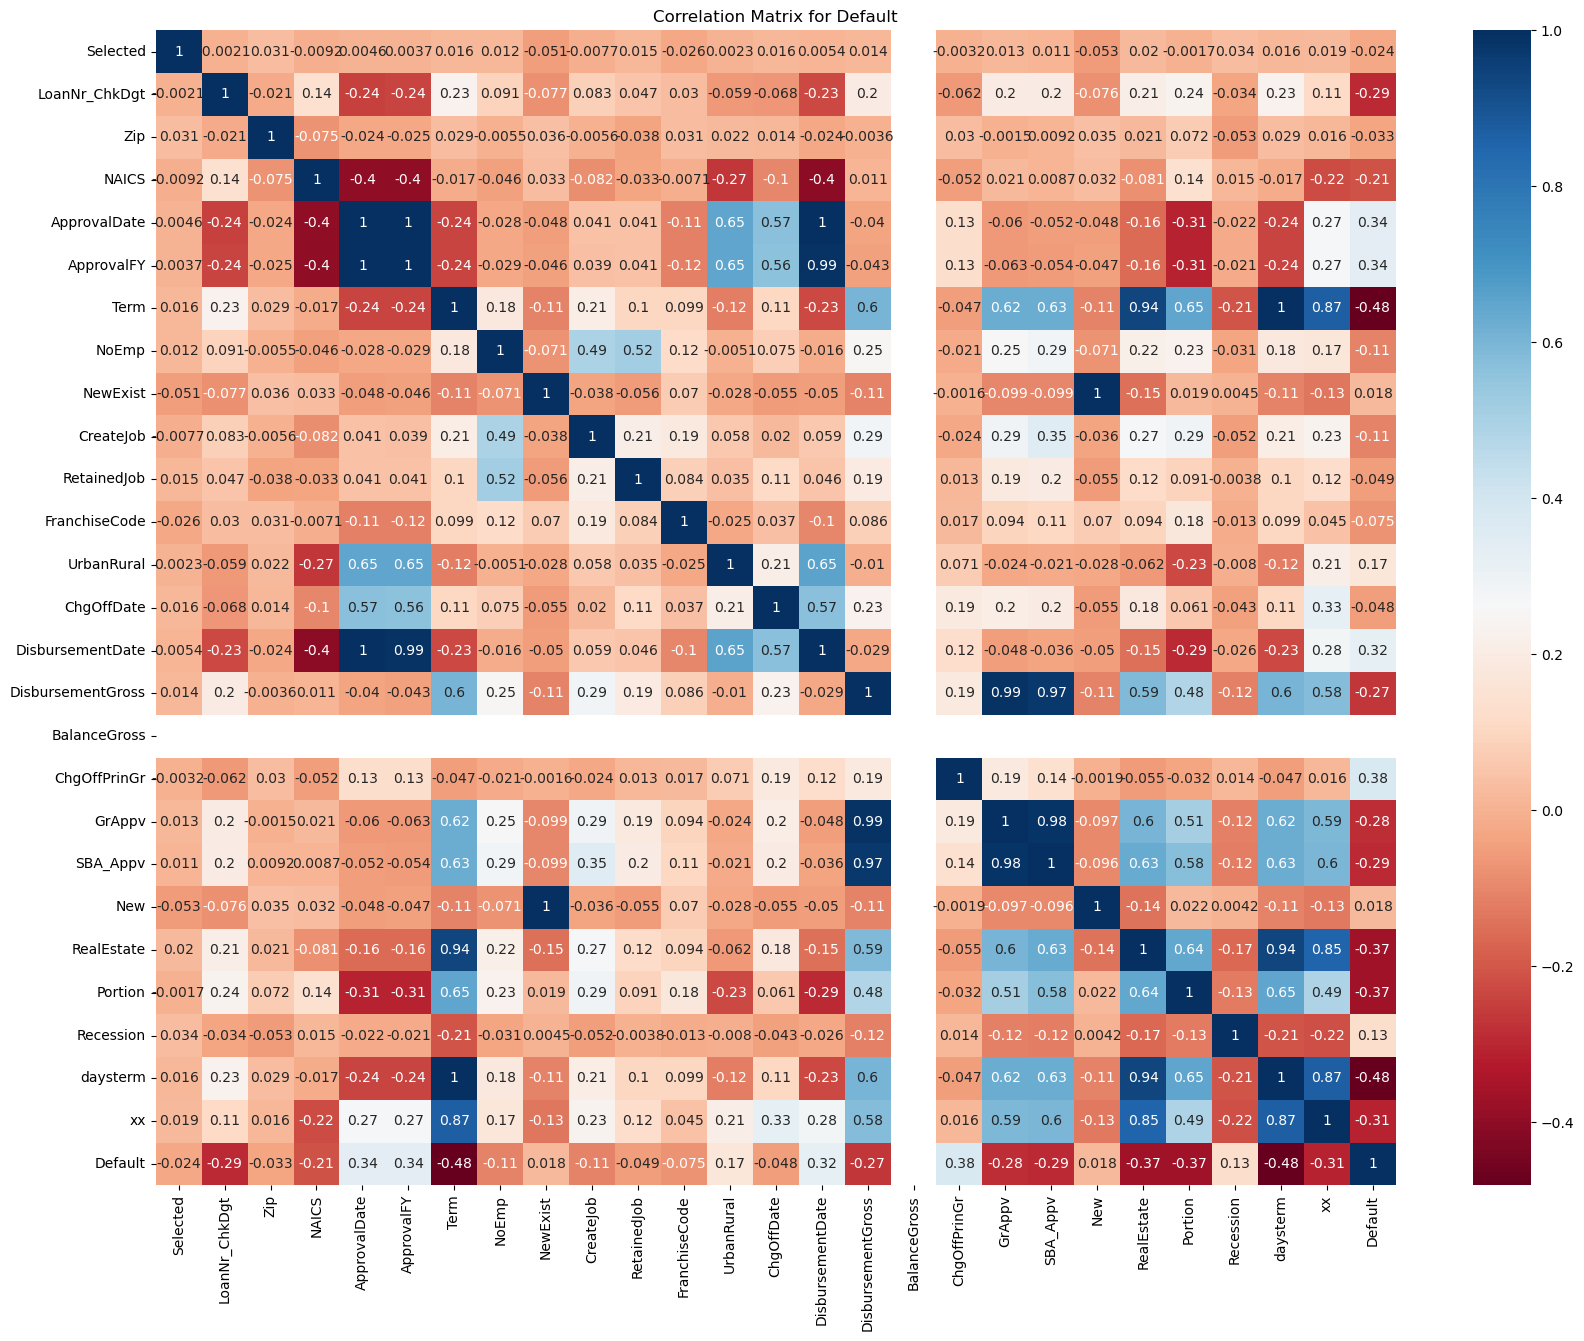

In [21]:
# Correlation Matrix

corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.title("Correlation Matrix for Default")

plt.show()

In [22]:
# Rank Correlations

target = corr['Default'].abs().sort_values(ascending=False)
new_predictors = target[1:]  # Exclude the target variable
new_predictors

daysterm             0.480625
Term                 0.480625
ChgOffPrinGr         0.380183
RealEstate           0.369024
Portion              0.367511
ApprovalDate         0.340179
ApprovalFY           0.339830
DisbursementDate     0.323555
xx                   0.310533
SBA_Appv             0.294976
LoanNr_ChkDgt        0.293191
GrAppv               0.284238
DisbursementGross    0.271244
NAICS                0.214481
UrbanRural           0.169435
Recession            0.128548
NoEmp                0.109606
CreateJob            0.107727
FranchiseCode        0.074524
RetainedJob          0.048532
ChgOffDate           0.047680
Zip                  0.032686
Selected             0.024351
NewExist             0.018328
New                  0.017592
BalanceGross              NaN
Name: Default, dtype: float64

<Figure size 1200x800 with 0 Axes>

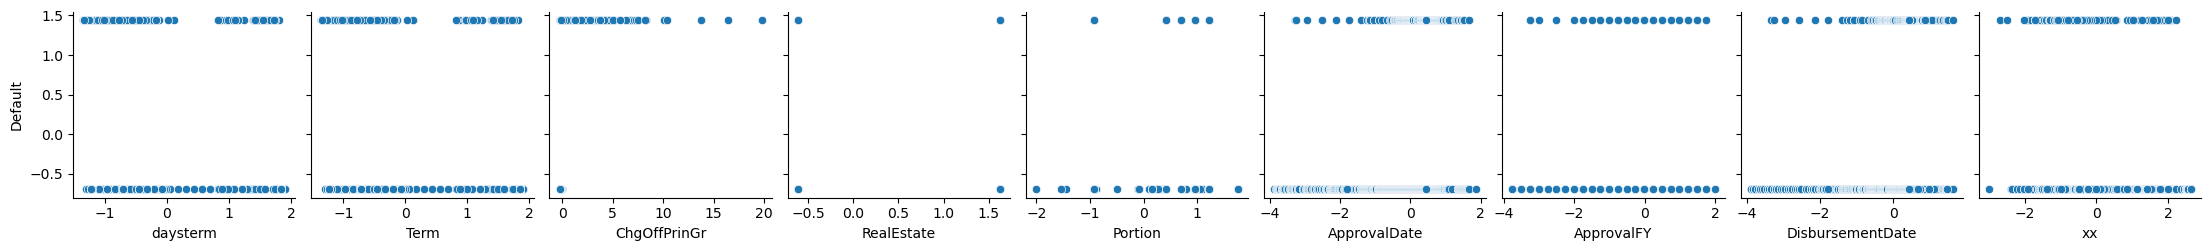

In [23]:
# Alternative Scatterplots of Numerical Predictors

numerical_predictors = ['daysterm', 'Term', 'ChgOffPrinGr', 'RealEstate', 'Portion', 'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'xx']

plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=numerical_predictors, y_vars=['Default'])

plt.show()

Based on the correlation values between the predictors and the 'Default' target variable, the following predictors seem to have a stronger positive correlation with 'Default':

1. daysterm: 0.480625
2. Term: 0.480625
3. ChgOffPrinGr: 0.380183
4. RealEstate: 0.369024
5. Portion: 0.367511
6. ApprovalDate: 0.340179
7. ApprovalFY: 0.339830
8. DisbursementDate: 0.323555
9. xx: 0.310641
10. SBA_Appv: 0.294976
11. LoanNr_ChkDgt: 0.293191
12. GrAppv: 0.284238
13. DisbursementGross: 0.271244
14. NAICS: 0.214481

In [24]:
import pandas as pd
from sklearn.decomposition import PCA

numeric_columns = ['LoanNr_ChkDgt', 'NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'daysterm', 'xx']

# Normalize before PCA

df_normalized = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

pcs = PCA()
pcs.fit(df_normalized)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.2549,1.4657,1.2826,1.1304,0.9970,0.9595,0.8916,0.8610,0.8116,0.6135,0.5693,0.1564,0.0780,0.0568,0.0
Proportion of variance,0.3390,0.1432,0.1097,0.0852,0.0663,0.0614,0.0530,0.0494,0.0439,0.0251,0.0216,0.0016,0.0004,0.0002,0.0
Cumulative proportion,0.3390,0.4822,0.5919,0.6771,0.7433,0.8047,0.8577,0.9071,0.9510,0.9761,0.9977,0.9994,0.9998,1.0000,1.0


In [25]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=df_normalized.columns)
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
LoanNr_ChkDgt,0.122396,0.216111,0.040271,-0.068870,0.338211,-0.753814,0.358998,-0.277650,-0.110626,-0.058096,0.166451,-0.003932,-0.000939,-0.004859,-0.000000e+00
NAICS,-0.016411,0.418933,0.062510,0.221452,0.202442,-0.156745,-0.188104,0.584348,0.550084,-0.029835,0.159222,0.001070,0.005537,0.003798,-5.268688e-18
ApprovalFY,-0.043870,-0.611201,-0.086294,0.017952,0.088347,-0.086950,-0.070330,0.140508,0.046287,-0.128901,0.641866,0.020468,-0.033127,-0.380025,-3.112286e-16
Term,0.382129,0.109677,-0.206817,-0.287956,-0.050115,0.107477,0.147099,0.011856,0.182576,0.008238,-0.087650,0.021262,-0.015279,-0.372351,7.071068e-01
NoEmp,0.169019,-0.075025,0.585547,-0.123489,0.138937,0.133528,0.043447,-0.103241,0.143183,0.710569,0.180237,0.010248,-0.003077,-0.000444,1.539609e-17
CreateJob,0.181629,-0.114881,0.428419,-0.112190,-0.131453,-0.141747,-0.443897,-0.397750,0.378559,-0.452557,-0.120774,0.047284,-0.010863,-0.002705,1.164913e-16
RetainedJob,0.119797,-0.103837,0.505456,-0.052082,0.249632,0.246248,0.441687,0.360459,-0.194472,-0.462186,-0.131213,-0.006616,0.000115,0.000258,-9.297576e-17
FranchiseCode,0.068862,0.047539,0.230713,-0.064379,-0.824628,-0.329633,0.142950,0.305681,-0.132219,0.043062,0.116814,0.009539,0.000358,-0.002486,5.564479e-18
UrbanRural,-0.013572,-0.534046,-0.069429,-0.038702,0.112818,-0.394582,-0.014290,0.289276,0.154920,0.218470,-0.619791,-0.010401,0.001214,-0.002205,-3.227495e-16
DisbursementGross,0.395542,-0.019912,-0.021661,0.320769,0.044065,-0.023322,-0.162702,0.049102,-0.231035,0.034196,-0.014129,0.594113,0.548288,-0.009120,-1.920602e-15


In [26]:
# Rank and find PC9

pca9 = pcsComponents_df['PC9'].abs()

pca9_vars = pca9.sort_values(ascending=False)

print(pca9_vars)

NAICS                0.550084
ChgOffPrinGr         0.436261
CreateJob            0.378559
DisbursementGross    0.231035
GrAppv               0.215698
SBA_Appv             0.207931
xx                   0.199468
RetainedJob          0.194472
Term                 0.182576
daysterm             0.182576
UrbanRural           0.154920
NoEmp                0.143183
FranchiseCode        0.132219
LoanNr_ChkDgt        0.110626
ApprovalFY           0.046287
Name: PC9, dtype: float64


# Based on both the correlation coefficients and the PCA results:

['Term','xx','ChgOffPrinGr','DisbursementGross',
'NAICS','UrbanRural','CreateJob',
'FranchiseCode','RetainedJob','GrAppv'
,'SBA_Appv','LoanNr_ChkDgt']

1. daysterm and Term: Both daysterm and Term have high correlation coefficients with 'Default', and they also have relatively high loadings on PC9 in the PCA analysis. Howver, they have multicolonearity because they are related. So only choose one of these variables.

These variables show consistent associations with 'Default' in both the correlation and PCA analyses.

In [27]:
# Final Selection:

predictors= ['Term','xx','ChgOffPrinGr','DisbursementGross','NAICS','UrbanRural','CreateJob','FranchiseCode','RetainedJob','GrAppv','SBA_Appv','LoanNr_ChkDgt']

outcome = 'Default'